In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

In [2]:
competitions = [
['Web Traffic Time Series Forecasting',19,1095],
['Porto Seguro’s Safe Driver Prediction',21,5163],
['TalkingData AdTracking Fraud Detection Challenge',30,3946],
['RSNA Pneumonia Detection Challenge',41,1499],
['Recruit Restaurant Visitor Forecasting',42,2157],
['Sberbank Russian Housing Market',56,3274],
['Corporación Favorita Grocery Sales Forecasting',64,1674],
['Home Credit Default Risk',108,7190],
['Instacart Market Basket Analysis',259,2622],
['Planet: Understanding the Amazon from Space',120,938],
['Zillow Prize: Zillow’s Home Value Prediction (Zestimate)',3617,3775]]

In [3]:
df = pd.DataFrame(competitions, columns=['competition', 'irank', 'nteams']).set_index('competition')
df['pctrank'] = df.irank/df.nteams
df.sort_values('pctrank')

,irank,nteams,pctrank
competition,,,
Porto Seguro’s Safe Driver Prediction,21,5163,0.004067
TalkingData AdTracking Fraud Detection Challenge,30,3946,0.007603
Home Credit Default Risk,108,7190,0.015021
Sberbank Russian Housing Market,56,3274,0.017104
Web Traffic Time Series Forecasting,19,1095,0.017352
Recruit Restaurant Visitor Forecasting,42,2157,0.019471
RSNA Pneumonia Detection Challenge,41,1499,0.027352
Corporación Favorita Grocery Sales Forecasting,64,1674,0.038232
Instacart Market Basket Analysis,259,2622,0.098780


In [4]:
df_prob = pd.DataFrame(columns=['pctile','prob','lconf95','lconf90','hconf90','hconf95'])
for cutoff in [1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1]:
    nwin = (df.pctrank<cutoff).sum()
    ntot = len(df)
    pctwin = nwin/ntot
    confint = proportion_confint(nwin, ntot, method='beta')
    minconf = confint[0]
    maxconf = confint[1]
    confint = proportion_confint(nwin, ntot, method='beta', alpha=0.1)
    minconf90 = confint[0]
    maxconf90 = confint[1]
    row = pd.DataFrame({'pctile':[cutoff], 'prob':[pctwin], 
                        'lconf95':[minconf], 'hconf95':[maxconf],
                        'lconf90':[minconf90], 'hconf90':[maxconf90]})
    df_prob = pd.concat([df_prob, row], sort=False)
df_prob['pctile'] *= 100
df_prob.set_index('pctile',inplace=True)
df_prob

,prob,lconf95,lconf90,hconf90,hconf95
pctile,,,,,
0.1,0.000000,0,0,0.238404,0.284914
0.2,0.000000,0,0,0.238404,0.284914
0.5,0.090909,0.00229897,0.00465217,0.364359,0.412780
1.0,0.181818,0.0228312,0.0333192,0.470087,0.517756
2.0,0.545455,0.233794,0.27125,0.800424,0.832512
5.0,0.727273,0.390257,0.435626,0.921180,0.939782
10.0,0.818182,0.482244,0.529913,0.966681,0.977169
20.0,0.909091,0.58722,0.635641,0.995348,0.997701


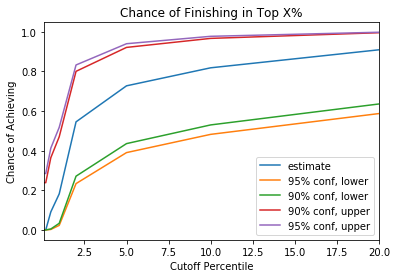

In [5]:
ax = df_prob.plot(
        title='Chance of Finishing in Top X%')
ax.legend(labels=['estimate', '95% conf, lower', '90% conf, lower', '90% conf, upper', '95% conf, upper'])
ax.set(xlabel="Cutoff Percentile", ylabel="Chance of Achieving")
plt.show()